In [3]:
import pandas as pd 

In [5]:
df = pd.read_csv('Online Sales Data.csv')

In [7]:
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

   Transaction ID        Date Product Category             Product Name  \
0           10001  2024-01-01      Electronics            iPhone 14 Pro   
1           10002  2024-01-02  Home Appliances         Dyson V11 Vacuum   
2           10003  2024-01-03         Clothing         Levi's 501 Jeans   
3           10004  2024-01-04            Books        The Da Vinci Code   
4           10005  2024-01-05  Beauty Products  Neutrogena Skincare Set   

   Units Sold  Unit Price  Total Revenue         Region Payment Method  
0           2      999.99        1999.98  North America    Credit Card  
1           1      499.99         499.99         Europe         PayPal  
2           3       69.99         209.97           Asia     Debit Card  
3           4       15.99          63.96  North America    Credit Card  
4           1       89.99          89.99         Europe         PayPal  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Co

In [9]:
df = df.dropna()
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
print(df.dtypes)

Transaction ID               int64
Date                datetime64[ns]
Product Category            object
Product Name                object
Units Sold                   int64
Unit Price                 float64
Total Revenue              float64
Region                      object
Payment Method              object
dtype: object


In [13]:
df['Total Revenue'] = pd.to_numeric(df['Total Revenue'], errors='coerce')

In [15]:
df = df.dropna(subset=['Total Revenue'])

In [17]:
df['Total Revenue'] = df['Total Revenue'].fillna(0)

In [19]:
grouped = df.groupby(df['Date'].dt.to_period('M'))
print(grouped['Total Revenue'].sum())

Date
2024-01    14548.32
2024-02    10803.37
2024-03    12849.24
2024-04    12451.69
2024-05     8455.49
2024-06     7384.55
2024-07     6797.08
2024-08     7278.11
Freq: M, Name: Total Revenue, dtype: float64


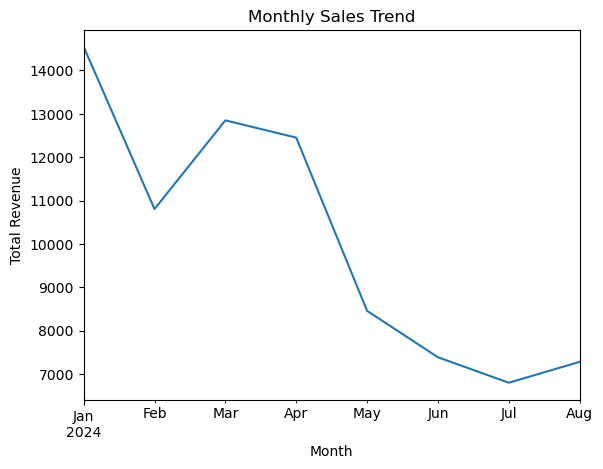

In [21]:
## MONTHLY SALES ANALYSIS

import matplotlib.pyplot as plt
df['Date'] = pd.to_datetime(df['Date'])

grouped = df.groupby(df['Date'].dt.to_period('M'))
sales_by_month = grouped['Total Revenue'].sum()

sales_by_month.plot(kind='line', title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show() 

In [22]:
df['Total Revenue'] = df['Total Revenue'].astype(float)
df['Date'] = pd.to_datetime(df['Date'])

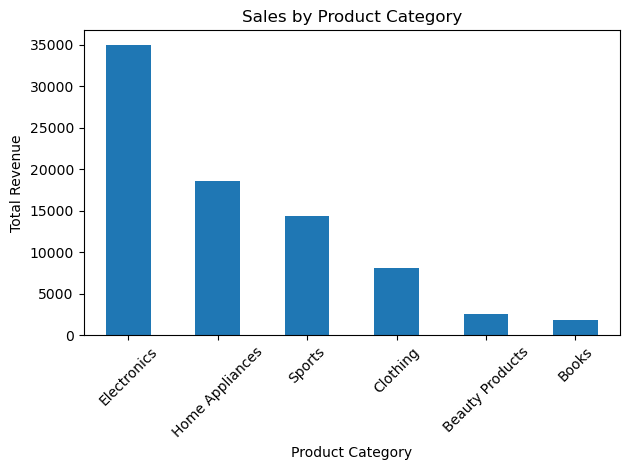

In [25]:
## SALES BY PRODUCT CATEGORY 

grouped_category = df.groupby('Product Category')
sales_by_category = grouped_category['Total Revenue'].sum().sort_values(ascending=False)

sales_by_category.plot(kind='bar', title='Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

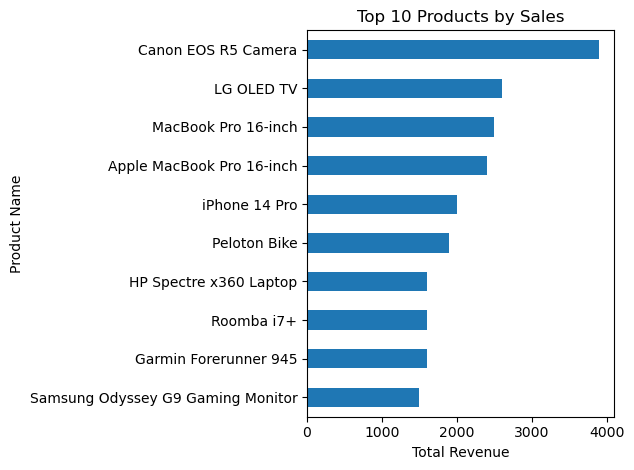

In [27]:
## TOP PRODUCTS BY SALES 

grouped_product = df.groupby('Product Name')
top_products = grouped_product['Total Revenue'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='barh', title='Top 10 Products by Sales')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()  # To show the top product at the top
plt.tight_layout()
plt.show()

In [29]:
sales_by_month.to_csv('sales_by_month.csv')
sales_by_category.to_csv('sales_by_category.csv')
top_products.to_csv('top_products.csv')

In [31]:
df.to_csv('Online Sales Data.csv', index=False)

In [33]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [42]:
import psycopg2
import pandas as pd

conn = psycopg2.connect(
    dbname="onlinesalesdb",
    user="postgres",
    password="Radhe1234@",
    host="localhost",
    port="5432"
)

query = "SELECT product_category, SUM(total_revenue) AS sales FROM sales_data GROUP BY product_category ORDER BY sales DESC;"
df_category = pd.read_sql(query, conn)

print(df_category)
conn.close()


  product_category     sales
0      Electronics  34982.41
1  Home Appliances  18646.16
2           Sports  14326.52
3         Clothing   8128.93
4  Beauty Products   2621.90
5            Books   1861.93


C:\Users\dhima\AppData\Local\Temp\ipykernel_23124\2467437163.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_category = pd.read_sql(query, conn)
